In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/huggingface

/content/drive/MyDrive/huggingface


## Library 설치

In [3]:
!pip install transformers==4.41.2 evaluate==0.4.0 datasets==2.20.0 scikit-learn==1.4.2 peft==0.10.0
!pip install accelerate -U
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 117.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: toke

## Named Entity Recognition

### 1) 데이터셋 로드

In [4]:
from datasets import load_dataset, DatasetDict
import pandas as pd

dataset = load_dataset('klue', 'ner')
print(dataset)
print(f"샘플: {dataset['train'][0]}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/21008 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'tokens', 'ner_tags'],
        num_rows: 21008
    })
    validation: Dataset({
        features: ['sentence', 'tokens', 'ner_tags'],
        num_rows: 5000
    })
})
샘플: {'sentence': '특히 <영동고속도로:LC> <강릉:LC> 방향 <문막휴게소:LC>에서 <만종분기점:LC>까지 <5㎞:QT> 구간에는 승용차 전용 임시 갓길차로제를 운영하기로 했다.', 'tokens': ['특', '히', ' ', '영', '동', '고', '속', '도', '로', ' ', '강', '릉', ' ', '방', '향', ' ', '문', '막', '휴', '게', '소', '에', '서', ' ', '만', '종', '분', '기', '점', '까', '지', ' ', '5', '㎞', ' ', '구', '간', '에', '는', ' ', '승', '용', '차', ' ', '전', '용', ' ', '임', '시', ' ', '갓', '길', '차', '로', '제', '를', ' ', '운', '영', '하', '기', '로', ' ', '했', '다', '.'], 'ner_tags': [12, 12, 12, 2, 3, 3, 3, 3, 3, 12, 2, 3, 12, 12, 12, 12, 2, 3, 3, 3, 3, 12, 12, 12, 2, 3, 3, 3, 3, 12, 12, 12, 8, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]}


### 2) EDA

label list: ['B-DT', 'I-DT', 'B-LC', 'I-LC', 'B-OG', 'I-OG', 'B-PS', 'I-PS', 'B-QT', 'I-QT', 'B-TI', 'I-TI', 'O']
id2label: {0: 'B-DT', 1: 'I-DT', 2: 'B-LC', 3: 'I-LC', 4: 'B-OG', 5: 'I-OG', 6: 'B-PS', 7: 'I-PS', 8: 'B-QT', 9: 'I-QT', 10: 'B-TI', 11: 'I-TI', 12: 'O'}
label2id: {'B-DT': 0, 'I-DT': 1, 'B-LC': 2, 'I-LC': 3, 'B-OG': 4, 'I-OG': 5, 'B-PS': 6, 'I-PS': 7, 'B-QT': 8, 'I-QT': 9, 'B-TI': 10, 'I-TI': 11, 'O': 12}
train 데이터셋의 tokens: 0
train 데이터셋의 tags: 0
validation 데이터셋의 tokens: 0
validation 데이터셋의 tags: 0


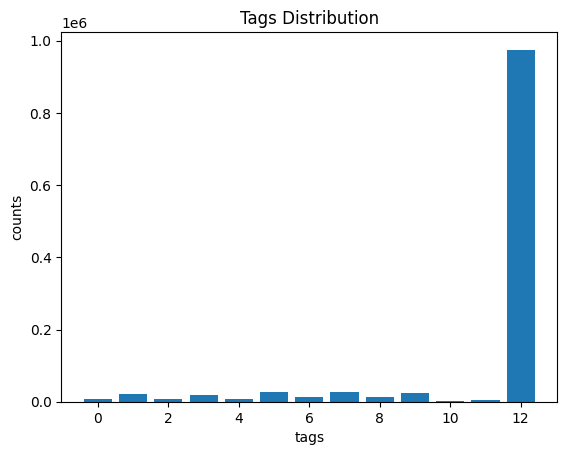

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 2.1 텍스트, 레이블 컬럼 지정 및 레이블리스트, id2label, label2id
TOK_COL, TAG_COL = 'tokens', 'ner_tags'
label_list = dataset['train'].features[TAG_COL].feature.names
print(f"label list: {label_list}")
id2label = {i: l for i, l in enumerate(label_list)}
label2id = {l: i for i, l in enumerate(label_list)}
print(f"id2label: {id2label}")
print(f"label2id: {label2id}")

# 2.2 텍스트, 레이블 결측치 확인
for split in dataset:
    df = pd.DataFrame(dataset[split])
    missing_tokens = df[TOK_COL].isna().sum() + (df[TOK_COL].astype(str).str.strip() == '').sum()
    missing_tags = df[TAG_COL].isna().sum()
    print(f"{split} 데이터셋의 tokens: {missing_tokens}")
    print(f"{split} 데이터셋의 tags: {missing_tags}")

# 2.3 레이블 분포
train_tags = dataset['train'][TAG_COL]
tags = []
for i in range(len(train_tags)):
    for j in range(len(train_tags[i])):
        tags.append(train_tags[i][j])

label_counts = np.unique(tags, return_counts=True)
plt.bar(label_counts[0], label_counts[1])
plt.xlabel('tags')
plt.ylabel('counts')
plt.title('Tags Distribution')
plt.show()

### 3) Preprocessing

In [6]:
# 3.1 결측치 처리
def not_empty(ex):
    return len(ex[TOK_COL]) > 0

dataset = dataset.filter(not_empty)
print(f"dataset: {dataset}")

# 3.2 토크나이저 및 collator
from transformers import AutoTokenizer, DataCollatorForTokenClassification
MODEL_NAME = 'LDCC/koelectra-small-discriminator'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
label_all_tokens = False

def tokenize_and_align_labels(examples):
    tokenized = tokenizer(examples[TOK_COL], is_split_into_words=True, truncation=True, max_length=256)

    aligned_labels = []

    for i, labels in enumerate(examples[TAG_COL]):
        word_ids = tokenized.word_ids(i)
        prev = None
        label_ids = []

        for w in word_ids:
            if w is None:
                label_ids.append(-100)
            elif w != prev:
                label_ids.append(labels[w])
            else:
                label_ids.append(-100 if not label_all_tokens else labels[w])

            prev = w
        aligned_labels.append(label_ids)

    tokenized['labels'] = aligned_labels

    return tokenized

# 3.3 데이터 분할
split_data = dataset['train'].train_test_split(test_size=0.15, seed=42)
dataset = DatasetDict({
    'train': split_data['train'],
    'validation': split_data['test'],
    'test': dataset['validation']
})

print(f"분할 후 데이터셋: {dataset}")

tokenized = dataset.map(tokenize_and_align_labels, batched=True, remove_columns=['sentence', 'tokens', 'ner_tags'])
print(f"tokenized dataset: {tokenized}")
collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

Filter:   0%|          | 0/21008 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

dataset: DatasetDict({
    train: Dataset({
        features: ['sentence', 'tokens', 'ner_tags'],
        num_rows: 21008
    })
    validation: Dataset({
        features: ['sentence', 'tokens', 'ner_tags'],
        num_rows: 5000
    })
})


tokenizer_config.json:   0%|          | 0.00/56.0 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/458 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

분할 후 데이터셋: DatasetDict({
    train: Dataset({
        features: ['sentence', 'tokens', 'ner_tags'],
        num_rows: 17856
    })
    validation: Dataset({
        features: ['sentence', 'tokens', 'ner_tags'],
        num_rows: 3152
    })
    test: Dataset({
        features: ['sentence', 'tokens', 'ner_tags'],
        num_rows: 5000
    })
})


Map:   0%|          | 0/17856 [00:00<?, ? examples/s]

Map:   0%|          | 0/3152 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

tokenized dataset: DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 17856
    })
    validation: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 3152
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 5000
    })
})


### 4) 모델 및 학습 설정

In [7]:
from transformers import AutoModelForTokenClassification
import torch

model = AutoModelForTokenClassification.from_pretrained(MODEL_NAME, num_labels=len(label_list), id2label=id2label, label2id=label2id)
print(f"모델 구조: {model}")

if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"There are {torch.cuda.device_count()} GPU(s) available.")
    print(f"Device name: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device('cpu')
    print(f"No GPU Available, using the CPU instead.")

model.to(device)

pytorch_model.bin:   0%|          | 0.00/58.9M [00:00<?, ?B/s]

Some weights of ElectraForTokenClassification were not initialized from the model checkpoint at LDCC/koelectra-small-discriminator and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


모델 구조: ElectraForTokenClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(40000, 128, padding_idx=0)
      (position_embeddings): Embedding(128, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense)

ElectraForTokenClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(40000, 128, padding_idx=0)
      (position_embeddings): Embedding(128, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linea

### 5) 데이터 로더 설정

In [8]:
print(f"학습 데이터: {tokenized['train']}")
print(f"검증 데이터: {tokenized['validation']}")
print(f"테스트 데이터: {tokenized['test']}")

학습 데이터: Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 17856
})
검증 데이터: Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 3152
})
테스트 데이터: Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 5000
})


In [9]:
from torch.utils.data import DataLoader

def _to_dataloader(dataset, collator, batch_size, shuffle=False):
    return DataLoader(
        dataset,
        collate_fn=collator,
        batch_size=batch_size,
        shuffle=shuffle,
        pin_memory=True
    )

train_loader = _to_dataloader(tokenized['train'], collator, batch_size=64, shuffle=True)
val_loader = _to_dataloader(tokenized['validation'], collator, batch_size=32, shuffle=False)
test_loader = _to_dataloader(tokenized['test'], collator, batch_size=32, shuffle=False)

print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

279
99
157


### 6) 학습

In [10]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)
epochs= 5

/usr/local/lib/python3.12/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [11]:
import evaluate

seqeval = evaluate.load('seqeval')
print(seqeval)

EvaluationModule(name: "seqeval", module_type: "metric", features: {'predictions': Sequence(feature=Value(dtype='string', id='label'), length=-1, id='sequence'), 'references': Sequence(feature=Value(dtype='string', id='label'), length=-1, id='sequence')}, usage: """
Produces labelling scores along with its sufficient statistics
from a source against one or more references.

Args:
    predictions: List of List of predicted labels (Estimated targets as returned by a tagger)
    references: List of List of reference labels (Ground truth (correct) target values)
    suffix: True if the IOB prefix is after type, False otherwise. default: False
    scheme: Specify target tagging scheme. Should be one of ["IOB1", "IOB2", "IOE1", "IOE2", "IOBES", "BILOU"].
        default: None
    mode: Whether to count correct entity labels with incorrect I/B tags as true positives or not.
        If you want to only count exact matches, pass mode="strict". default: None.
    sample_weight: Array-like of sha

In [17]:
from sklearn.metrics import f1_score
def ner_metrics(pred_tags, true_tags):
    """
    pred_tags / true_tags: 각 문장별 태그 문자열 리스트의 리스트 (ex. [["B-ORG","I-ORG","O",...], ...])
    엔티티 단위 성능(seqeval) + 참고용 토큰 F1(micro/macro) 반환
    """

    # Entity-level (주 지표)
    ent = seqeval.compute(predictions=pred_tags, references=true_tags)

    # Token-level 참고 지표
    flat_pred = [t for seq in pred_tags for t in seq]
    flat_true = [t for seq in true_tags for t in seq]
    labels_for_sklearn = sorted(set(flat_true + flat_pred))
    tok_micro = f1_score(flat_true, flat_pred, average='micro', labels=labels_for_sklearn)
    tok_macro = f1_score(flat_true, flat_pred, average='macro', labels=labels_for_sklearn)

    return {
        'ent_precision': ent['overall_precision'],
        'ent_recall': ent['overall_recall'],
        'ent_f1': ent['overall_f1'],
        'ent_accuracy': ent['overall_accuracy'],
        'tok_micro_f1': tok_micro,
        'tok_macro_f1': tok_macro
    }

In [18]:
def _decode_batch_outputs(logits, labels):
    """
    DataLoader 배치에서 모델 logits/labels를 받아 -100을 제외하고 태그 문자열로 변환해 변환
    """
    pred_ids = logits.argmax(dim=-1).detach().cpu().tolist()
    true_ids = labels.detach().cpu().tolist()

    batch_pred_tags, batch_true_tags = [], []

    for p_seq, t_seq in zip(pred_ids, true_ids):
        p_tags, t_tags = [], []
        for p, t in zip(p_seq, t_seq):
            if t == -100:
                continue

            p_tags.append(id2label[int(p)])
            t_tags.append(id2label[int(t)])

        batch_pred_tags.append(p_tags)
        batch_true_tags.append(t_tags)

    return batch_pred_tags, batch_true_tags

In [19]:
from tqdm import tqdm
def train(model, train_loader, optimizer, device):

    model.train()
    total_loss = 0

    for step, batch in tqdm(enumerate(train_loader), desc='Training Batch'):
        batch = {k: v.to(device) for k, v in batch.items()}

        # Token classification은 labels 포함해서 forward -> loss반환
        outputs = model(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
            labels=batch["labels"]
        )
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += float(loss.item())

    return total_loss / len(train_loader)

In [20]:
@torch.no_grad()
def evaluate(model, valid_loader, device):
    """
    검증/테스트 공용 평가.
    return: (평균 loss, metrics dict)
    """
    model.eval()
    total_loss = 0.0
    all_pred_tags, all_true_tags = [], []

    for batch in valid_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
            labels=batch["labels"]
        )
        if outputs.loss is not None:
            total_loss += float(outputs.loss.item())

        # logits → 태그 문자열, 라벨 → 태그 문자열
        batch_pred_tags, batch_true_tags = _decode_batch_outputs(outputs.logits, batch["labels"])
        all_pred_tags.extend(batch_pred_tags)
        all_true_tags.extend(batch_true_tags)

    metrics = ner_metrics(all_pred_tags, all_true_tags)
    avg_loss = total_loss / max(1, len(valid_loader))
    return avg_loss, metrics

In [24]:
# ===== Main Training Loop =====
best_f1 = -1.0
best_path = "./model_checkpoint_ner.pt"

for epoch in range(1, epochs + 1):
    print(f"======== Epoch {epoch} / {epochs} ========")
    avg_train_loss = train(model, train_loader, optimizer, device)
    print(f"Train Loss: {avg_train_loss:.4f}")

    print("\nRunning Validation...")
    avg_val_loss, val_metrics = evaluate(model, val_loader, device)
    print(f"  Validation Loss: {avg_val_loss:.4f}")
    print(f"  Entity F1: {val_metrics['ent_f1']:.4f} | P: {val_metrics['ent_precision']:.4f} | R: {val_metrics['ent_recall']:.4f}")
    print(f"  Token Micro F1: {val_metrics['tok_micro_f1']:.4f} | Token Macro F1: {val_metrics['tok_macro_f1']:.4f}")

    # 엔티티 F1 기준 베스트 저장 (원하면 loss 기준으로 바꿔도 됨)
    if val_metrics["ent_f1"] > best_f1:
        print(f"F1 improved ({best_f1:.4f} → {val_metrics['ent_f1']:.4f}). Saving model ...")
        torch.save(model.state_dict(), best_path)
        best_f1 = val_metrics["ent_f1"]

======== Epoch 1 / 5 ========


Training Batch: 279it [01:03,  4.41it/s]


Train Loss: 0.1372

Running Validation...
  Validation Loss: 0.1588
  Entity F1: 0.7389 | P: 0.7053 | R: 0.7759
  Token Micro F1: 0.9514 | Token Macro F1: 0.8558
F1 improved (-1.0000 → 0.7389). Saving model ...
======== Epoch 2 / 5 ========


Training Batch: 279it [00:59,  4.72it/s]


Train Loss: 0.1179

Running Validation...
  Validation Loss: 0.1505
  Entity F1: 0.7491 | P: 0.7222 | R: 0.7780
  Token Micro F1: 0.9541 | Token Macro F1: 0.8632
F1 improved (0.7389 → 0.7491). Saving model ...
======== Epoch 3 / 5 ========


Training Batch: 279it [00:47,  5.84it/s]


Train Loss: 0.1014

Running Validation...
  Validation Loss: 0.1490
  Entity F1: 0.7640 | P: 0.7408 | R: 0.7888
  Token Micro F1: 0.9557 | Token Macro F1: 0.8678
F1 improved (0.7491 → 0.7640). Saving model ...
======== Epoch 4 / 5 ========


Training Batch: 279it [00:46,  6.01it/s]


Train Loss: 0.0896

Running Validation...
  Validation Loss: 0.1480
  Entity F1: 0.7644 | P: 0.7319 | R: 0.8001
  Token Micro F1: 0.9549 | Token Macro F1: 0.8693
F1 improved (0.7640 → 0.7644). Saving model ...
======== Epoch 5 / 5 ========


Training Batch: 279it [00:46,  5.96it/s]


Train Loss: 0.0792

Running Validation...
  Validation Loss: 0.1465
  Entity F1: 0.7789 | P: 0.7648 | R: 0.7936
  Token Micro F1: 0.9582 | Token Macro F1: 0.8754
F1 improved (0.7644 → 0.7789). Saving model ...


### 7) 모델 로드 및 평가

In [25]:
model.load_state_dict(torch.load(best_path))

avg_test_loss, test_metrics = evaluate(model, test_loader, device)
print(f"Test Loss: {avg_test_loss:.4f}")
print(f"Test Metrics: {test_metrics}")

Test Loss: 0.1927
Test Metrics: {'ent_precision': np.float64(0.7293803857201477), 'ent_recall': np.float64(0.7480535877112997), 'ent_f1': np.float64(0.7385989819592091), 'ent_accuracy': 0.9462024614702295, 'tok_micro_f1': np.float64(0.9462024614702295), 'tok_macro_f1': np.float64(0.860380275024472)}


### 8) 추론하기

In [26]:
from transformers import pipeline


tok_pipe = pipeline('token-classification', model=model, tokenizer=tokenizer, device=device, aggregation_strategy='simple')

print("\n[Demo]")
print(tok_pipe("삼성전자가 서울에서 회의를 열었다."))


[Demo]
[{'entity_group': 'OG', 'score': np.float32(0.41076067), 'word': '삼성전자', 'start': 0, 'end': 4}, {'entity_group': 'OG', 'score': np.float32(0.591969), 'word': '서울', 'start': 6, 'end': 8}]


### 9) Push to Hub

In [27]:
from huggingface_hub import notebook_login
notebook_login()

In [28]:
from transformers import AutoModelForTokenClassification, AutoTokenizer

# 1. 로컬 저장
saved_dir = './saved/ner_electra'
model.save_pretrained(saved_dir)
tokenizer.save_pretrained(saved_dir)

# 2. Hub로 업로드
model.push_to_hub('LDCC-koelectra-small-discriminator-ner', private=False)
tokenizer.push_to_hub('LDCC-koelectra-small-discriminator-ner')

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  /tmp/tmphty0ia0i/model.safetensors    :   1%|          |  552kB / 58.6MB            

README.md: 0.00B [00:00, ?B/s]

CommitInfo(commit_url='https://huggingface.co/SpeakingPotato/LDCC-koelectra-small-discriminator-ner/commit/b4556b092ac5f2cc2dbcd8e38c99289a6bb137e4', commit_message='Upload tokenizer', commit_description='', oid='b4556b092ac5f2cc2dbcd8e38c99289a6bb137e4', pr_url=None, repo_url=RepoUrl('https://huggingface.co/SpeakingPotato/LDCC-koelectra-small-discriminator-ner', endpoint='https://huggingface.co', repo_type='model', repo_id='SpeakingPotato/LDCC-koelectra-small-discriminator-ner'), pr_revision=None, pr_num=None)